In [1]:
import numpy as np
from scipy.stats import special_ortho_group
from aperiodic_codes.cut_and_project.cnp_utils import *
import matplotlib.pyplot as plt
from ipywidgets import *
from p3 import *

%matplotlib widget

In [6]:
prefix = "/data/apc"
f_base = f'{prefix}/penrose_p3/int';
n = 4;
nTh = 8;
lat_pts = gen_lat(low=-n, high=n, dim=5);
bulk = np.all(abs(lat_pts) != n,axis=1);
assert lat_pts.shape[0] == (2*n+1)**5, f'Number of lattice points should be {n**5}';
voronoi = gen_voronoi(dim=5);

In [3]:
h1 = gen_h1(n);
h2 = gen_h2(n);
hx, hz = gen_hgp(h1, h2);
hx_vv, hx_cc = get_hx_vv_cc(hx, n);
hz_vv, hz_cc = get_hz_vv_cc(hz, n);
hx = hx.tocsr();
hz = hz.tocsr();

In [4]:
offset = np.array([1,1,1,1,1])/4;
P = proj_mat();
proj_pos = P[:,:2];
proj_neg = P[:,2:];

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.141592653589793, min=-3.141592653589793, …

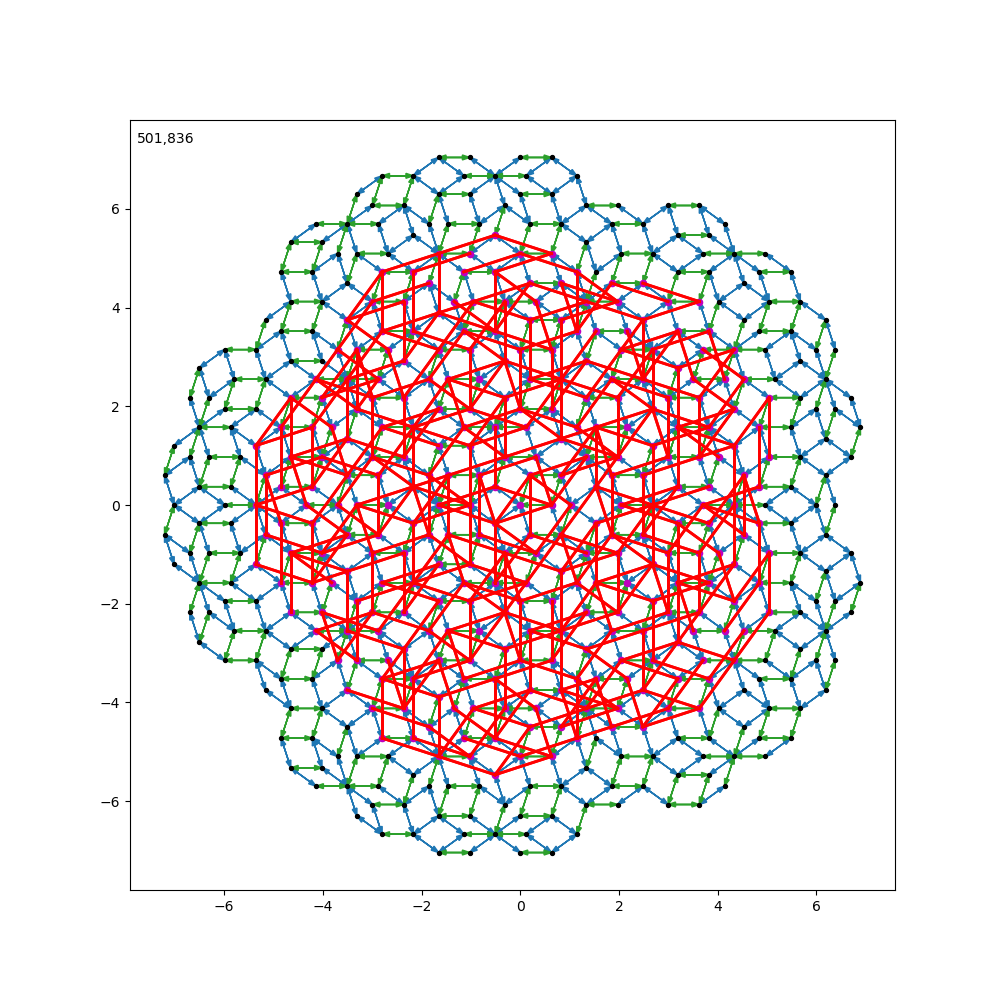

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111);
ax.set_aspect('equal', 'box')

def update(t0=0.0 , t1=0.0 , t2=0.0 , t3=0.0 , t4=0.0 , t5=0.0 , t6=0.0 , t7=0.0 , t8=0.0 , t9=0.0):
    ax.clear();
    R = gen_rotation((t0,t1,t2,t3,t4,t5,t6,t7,t8,t9),5);
    proj_pos_R = R @ proj_pos;
    proj_neg_R = R @ proj_neg;
    cut_ind, full_to_cut_ind_map = cut_ext(lat_pts, voronoi, proj_neg, offset, f_base, nTh);
    cut_pts = lat_pts[cut_ind,:];
    proj_pts = project(cut_pts, proj_pos_R);
    new_hx_vv = gen_new_pc_matrix(cut_pts, full_to_cut_ind_map, hx_vv, n);
    new_hx_cc = gen_new_pc_matrix(cut_pts, full_to_cut_ind_map, hx_cc, n);
    new_hz_vv = gen_new_pc_matrix(cut_pts, full_to_cut_ind_map, hz_vv, n);
    new_hz_cc = gen_new_pc_matrix(cut_pts, full_to_cut_ind_map, hz_cc, n);

    cut_bulk = [i for i in range(len(cut_ind)) if bulk[cut_ind[i]]];

    for x in np.argwhere(new_hx_cc != 0):
        ax.arrow(proj_pts[x[0],0],proj_pts[x[0],1],proj_pts[x[1],0]-proj_pts[x[0],0],proj_pts[x[1],1]-proj_pts[x[0],1],color='C0',length_includes_head=True,head_width=0.1);
    for x in np.argwhere(new_hz_cc != 0):
        ax.arrow(proj_pts[x[0],0],proj_pts[x[0],1],proj_pts[x[1],0]-proj_pts[x[0],0],proj_pts[x[1],1]-proj_pts[x[0],1],color='C2',length_includes_head=True,head_width=0.1);
    new_hx = np.hstack([new_hx_cc, new_hx_vv]);
    new_hz = np.hstack([new_hz_cc, new_hz_vv]);
    anti_comm_mat = (new_hx @ new_hz.T)[np.ix_(cut_bulk,cut_bulk)] % 2;
    print(anti_comm_mat.shape);
    for x in np.argwhere(anti_comm_mat != 0):
        ax.plot([proj_pts[cut_bulk[x[0]],0],proj_pts[cut_bulk[x[1]],0]],[proj_pts[cut_bulk[x[0]],1],proj_pts[cut_bulk[x[1]],1]],ls='-',lw=2,color='r');
    ax.scatter(proj_pts[:,0], proj_pts[:,1],color='k',s=8);
    ax.scatter(proj_pts[cut_bulk,0], proj_pts[cut_bulk,1],color='m',s=20);
    ax.text(0.01, 0.97, f'{cut_pts.shape[0]},{np.sum(anti_comm_mat)}',transform=ax.transAxes);

interact(update,t0=(-pi,pi,pi/30),t1=(-pi,pi,pi/30),t2=(-pi,pi,pi/30),t3=(-pi,pi,pi/30),t4=(-pi,pi,pi/30),t5=(-pi,pi,pi/30),t6=(-pi,pi,pi/30),t7=(-pi,pi,pi/30),t8=(-pi,pi,pi/30),t9=(-pi,pi,pi/30));